<a href="https://colab.research.google.com/github/MoizAhmed2517/Time-Series-Forecasting-Projects/blob/main/Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicting the BitCoin Forecasting

## Get Data

In [1]:
%cd /content/drive/MyDrive/ColabProjects

/content/drive/MyDrive/ColabProjects


In [2]:
!pwd

/content/drive/MyDrive/ColabProjects


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-02-23 18:48:24--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.01s   

2023-02-23 18:48:24 (16.8 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



###Importing libraries

In [3]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import csv
from datetime import datetime
from sklearn.model_selection import train_test_split

##Performing Exploratory Analysis

In [4]:
df = pd.read_csv("data_BTC.csv", parse_dates=["Date"], index_col=["Date"])

In [5]:
df.head(30)

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566
2013-10-06,BTC,120.65533,121.33866,121.85216,120.55450
2013-10-07,BTC,121.79500,120.65533,121.99166,120.43199
2013-10-08,BTC,123.03300,121.79500,123.64016,121.35066
2013-10-09,BTC,124.04900,123.03300,124.78350,122.59266


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Closing Price (USD),2787.0,6529.845141,10887.847444,108.58483,460.087500,2780.18250,8506.923720,63346.789035
24h Open (USD),2787.0,6513.579485,10863.800772,108.58483,459.400500,2772.36750,8496.887593,63562.673545
24h High (USD),2787.0,6710.061683,11206.779756,118.67500,469.720995,2874.69625,8763.291985,64801.787870
24h Low (USD),2787.0,6302.417386,10475.811252,83.32833,450.818830,2696.45750,8221.060570,62094.632914


In [7]:
df.isnull().sum()

Currency               0
Closing Price (USD)    0
24h Open (USD)         0
24h High (USD)         0
24h Low (USD)          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


#### Code is clean. No data is missing no problem with datatype. Good to perform EDA.

**Questions:**



1.   How many year data it is? How many sample do we have?
2.   Which day BTC is highest and on which date it is lowest?
3.   What is rate of change BTC every week, fortnight, month, quarter, semi-anually and annual.




In [9]:
#AQ1: Answer
len(df)

2787

In [10]:
years = (df.index[-1] - df.index[0])/np.timedelta64(1, "Y")
months = (years - np.floor(years)) * 12.008
days = (months - np.floor(months)) * 30.417
print(f"Total data timeframe is: {int(years)} Years, {int(months)} Months, {int(days)} Days")

Total data timeframe is: 7 Years, 7 Months, 16 Days


#### We have collected data for 7 years 7 months and 16 days data. As DL model like lots of sample hence we are good to as we have total 2787 days of data but as in timeseries smaller number of smaples is often run into data problems.


#### **Note:** The Seasonality of a time series dataset is reffered as the number of samples per year. so for our bitcoin data, it has a seasonality of daily or value of 365 because we collect one sample per day meaning. We'll get 365 days

<AxesSubplot:xlabel='Date'>

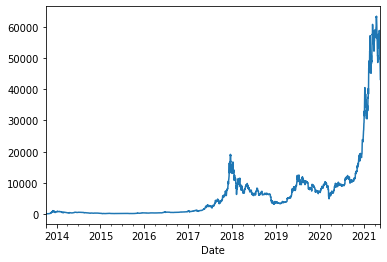

In [11]:
df['Closing Price (USD)'].plot()

In [12]:
bitcoin = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


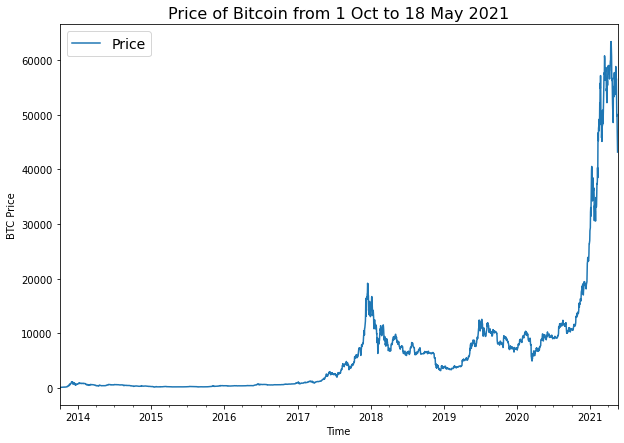

In [13]:
bitcoin.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.xlabel("Time")
plt.title("Price of Bitcoin from 1 Oct to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

In [14]:
# Q2: Answer
bitcoin[['Price']].idxmax()

Price   2021-04-16
dtype: datetime64[ns]

In [15]:
bitcoin[['Price']].idxmin()

Price   2013-10-03
dtype: datetime64[ns]

In [16]:
bitcoin.describe()

,Price
count,2787.000000
mean,6529.845141
std,10887.847444
min,108.584830
25%,460.087500
50%,2780.182500
75%,8506.923720
max,63346.789035


##Using Python CSV module for loading CSV files and plotting time series graph

In [17]:
time = []
price = []

with open('data_BTC.csv', "r", newline='') as csvfile:
  spamreader = csv.reader(csvfile, delimiter=",")
  next(spamreader, None)
  for row in spamreader:
    time.append(datetime.strptime(row[1], "%Y-%m-%d"))
    price.append(float(row[2]))

price = price[1:]
time = time[1:]

print(price)
print(time)

[125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795, 123.033, 124.049, 125.96116, 125.27966, 125.9275, 126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355, 175.03166, 177.6965, 187.15983, 192.75666, 197.4, 196.02499, 198.04883, 198.93233, 200.543, 210.3075, 225.02, 248.25333, 262.32666, 294.48699, 331.10325, 285.8875, 304.97974, 338.137, 357.48, 402.954, 409.10375, 420.21649, 437.29725, 510.6025, 693.65, 531.54249, 574.71599, 681.33, 774.18, 746.19374, 768.8475, 789.36475, 893.1815, 934.355, 1068.363, 1154.92593, 1099.51926, 1019.78966, 1028.845, 1071.2848, 1139.33083, 1004.61633, 759.43041, 689.81, 841.83966, 916.77599, 967.42866, 866.29003, 911.23204, 889.81946, 848.9975, 868.95316, 653.80483, 654.06266, 553.69166, 693.05883, 649.38965, 595.95883, 647.68316, 671.58116, 659.84333, 702.00083, 758.01016, 734.01166, 717.92623, 752.82022, 744.17249, 768.40783, 769.09849, 804.02719, 813.31748,

#### Plotting function

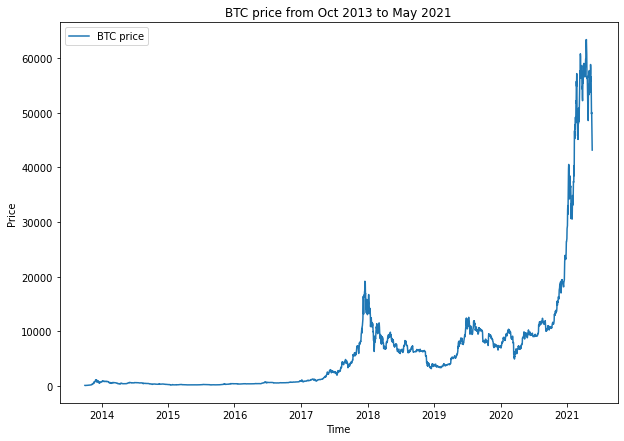

In [18]:
def plot_data(time, value):
  plt.figure(figsize=(10, 7))
  plt.plot(time, value, label="BTC price")
  plt.xlabel("Time")
  plt.ylabel("Price")
  plt.title("BTC price from Oct 2013 to May 2021")
  plt.legend()
  plt.show()


plot_data(time, price)

### Trai/Test Split (Wrong Way)

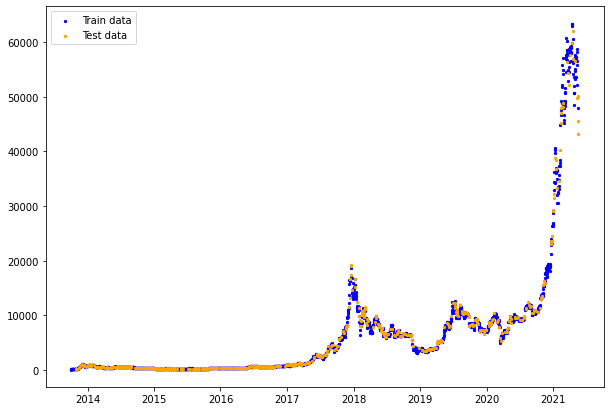

In [19]:
X_train, X_test, y_train, y_test = train_test_split(time, price, test_size=0.2, random_state=42)

plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, color='blue', label="Train data")
plt.scatter(X_test, y_test, s=5, color='orange', label="Test data")
plt.legend()
plt.show() 

#### The randomness in data create problem in timeseries as we can see in above graph that randomness will eliminate the flow or conitinue of the data. It is not simulating the real situation. In timeseries we are trying to predict the future that's why due to random split our data can see the future values hence this issue in time series is called Data leakage.

### Train/Test Split (Right Way)

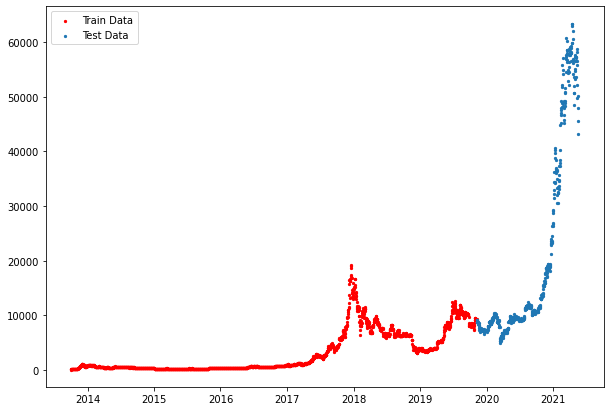

In [38]:
X_train, X_test, y_train, y_test = train_test_split(time, price, test_size=0.2, shuffle=False)
y_test = tf.constant(y_test)
y_test = tf.constant(y_test)
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, color="red", label="Train Data")
plt.scatter(X_test, y_test, s=5, label="Test Data")
plt.legend()
plt.show();

In [39]:
#Creating a plotting function

def plot_timeSeries(X_train, y_train, X_test, y_test):
  plt.figure(figsize=(10, 7))
  plt.scatter(X_train, y_train, s=5, label="Train Data")
  plt.scatter(X_test, y_test, s=5, color="red", label="Test Data")
  plt.title()
  plt.legend()
  plt.show();

def timeSeries_plot(timeSteps, prices, format=".", start=0, end=None, label=None):
  plt.plot(timeSteps[start:end], prices[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

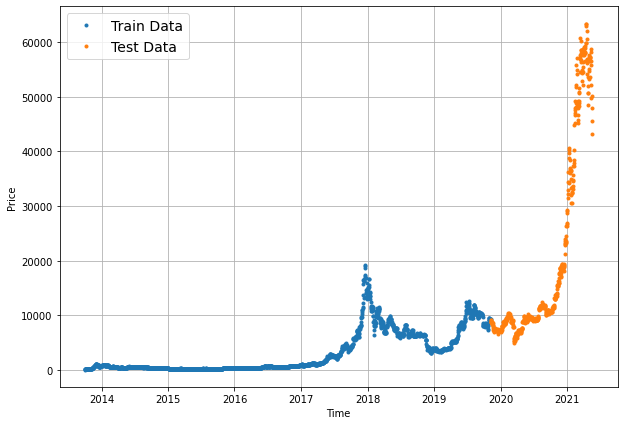

In [40]:
plt.figure(figsize=(10, 7))
timeSeries_plot(X_train, y_train, label="Train Data")
timeSeries_plot(X_test, y_test, label="Test Data")

## Modelling Experiments

####List of Experiments:

Experiment, horizon, window

* Naive Model (Baseline)
* Dense Model, 1, 7
* Same as Model_1, 1, 30
* Same as Model_2, 7, 30
* Conv1D
* LSTM
* Same as Model 1 (but with multivariate Data)
* N-BEATs algorithm
* Ensemble (multiple models stacked together)
* Future Prediction model
* Same as model 1 (but with turkey data introduced)

##Naive Forecast - Experiment#0

#### The formula for Naive Forecast is:

$$\hat{y}_{t} = y_{t-1}$$

Defination:
> The prediction at previous timestep t (y_hat) is equal to the the value at timestep t-1 (previous timestep) - this is for a horizon of 1.

In [41]:
y_test[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([9226.485 , 8794.358 , 8798.042 , 9081.187 , 8711.534 , 8760.893 ,
       8749.5205, 8656.971 , 8500.644 , 8469.261 ], dtype=float32)>

In [42]:
naive_forecast = y_test[:-1]

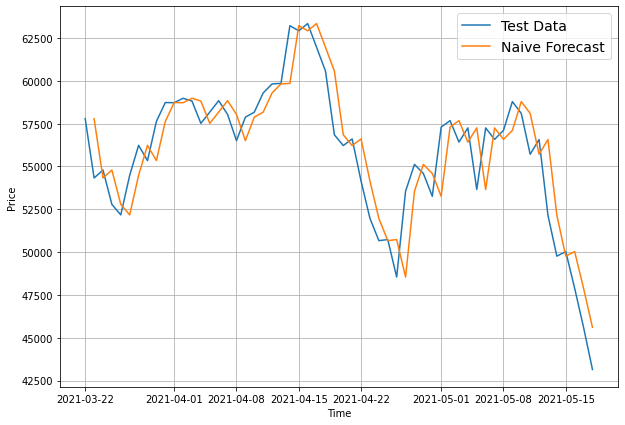

In [43]:
plt.figure(figsize=(10, 7))
# timeSeries_plot(timeSteps=X_train, prices=y_train, format=".", start=0, end=None, label="Train Data")
timeSeries_plot(timeSteps=X_test, prices=y_test, format="-", start=500, end=None, label="Test Data")
timeSeries_plot(timeSteps=X_test[1:], prices=naive_forecast, format='-', start=500, label="Naive Forecast")

> Why naive forecast is hard to beat, does the term autorgressive come up?

#### Evaluating the forecasting Model

We need regression matrix

* Root Mean Square Error (RMSE) *-Can be used with any regression problem*
* Mean Absolute Error (MAE) *-Can be used when larger error are more significant than small errors*
* Mean Squared Error (MSE) *-Can be used when larger error are more significant than small errors but it is more interpretable*
* R-squared
* Huber Loss *-Combo of MAE and MSE. Less sensitive to outliers than MSE*
* Mean Absolute percentage error (MAPE/sMAPE) *-It is recommended not to use by Hyndman & Koehler but you need to use your intution that which one is performing best. Mostly use in M-competitions*
* Mean Absolute scaled error (MASE) *-A scaled error > 1 if the forecast is worse than the naive and <1 if the forecast is better than naive*


**How our model;s forecast (y_pred) compared against the actual values (y_true or ground truth values)?**



In [44]:
def mean_absolute_scaled_error(y_true, y_pred):
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # Our seasonality is of 1 day
  return mae / mae_naive_no_season

In [46]:
mean_absolute_scaled_error(y_test[1:], naive_forecast).numpy()

0.99957

In [64]:
def time_series_evaluation_metrics(y_true, y_pred):
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {'MAE': mae.numpy(),
          'MSE': mse.numpy(),
          'RMSE': rmse.numpy(),
          'MAPE': mape.numpy(),
          'MASE': mase.numpy()}

In [70]:
time_series_evaluation_metrics(y_test[1:], naive_forecast)

{'MAE': 567.9802,
 'MSE': 1147547.0,
 'RMSE': 1071.2362,
 'MAPE': 2.5165248,
 'MASE': 0.99957}

In [66]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float32, numpy=20056.633>

In [68]:
tf.reduce_max(y_test), tf.reduce_min(y_test)

(<tf.Tensor: shape=(), dtype=float32, numpy=63346.79>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4944.702>)

In [74]:
print(f"{time_series_evaluation_metrics(y_test[1:], naive_forecast)['MAE'] / tf.reduce_max(y_test).numpy() * 100} %")

0.8966203778982162 %


In [75]:
print(f"{time_series_evaluation_metrics(y_test[1:], naive_forecast)['MAE'] / tf.reduce_min(y_test).numpy() * 100} %")

11.486642062664032 %


In [76]:
print(f"{time_series_evaluation_metrics(y_test[1:], naive_forecast)['MAE'] / tf.reduce_mean(y_test).numpy() * 100} %")

2.8318822383880615 %
